# Investigation into the Movement of Bumblebees

#### Citations

##### *Citation of Journal Publication*
Hagen M, Wikelski M, Kissling WD (2011) Space use of bumblebees (Bombus spp.) revealed by radio-tracking. PLoS ONE 6(5): e19997. doi:10.1371/journal.pone.0019997

##### *Citation of Movebank Data Repository*
Hagen M, Wikelski M, Kissling WD (2016) Data from: Space use of bumblebees (Bombus spp.) revealed by radio-tracking. Movebank Data Repository. doi:10.5441/001/1.k1fm26kh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
import warnings
warnings.filterwarnings('ignore')

In [2]:
bees = pd.read_csv('Space use of bumblebees (data from Hagen et al. 2011).csv')
bees_ref = pd.read_csv('Space use of bumblebees (data from Hagen et al. 2011)-reference-data.csv')

### Two Focus Areas

**1. Compare Queen and Workers**
    - Investigate the max distance traveled
    - Investigate mean distance traveled
    - Investigate the number of movements
    
**2.  Bee 001**
    - Investigate Different Behaviors
      

## Focus Area #1 : Compare Queen and Workers

In [3]:
bees_info = bees[['timestamp','location-lat','location-long','behavioural-classification','height-above-msl','individual-local-identifier']]
bees_info['location'] = list(zip(bees_info['location-lat'],bees_info['location-long']))

In [4]:
bees_info = bees_info[['timestamp','location','behavioural-classification','height-above-msl','individual-local-identifier']]
bees_info

,timestamp,location,behavioural-classification,height-above-msl,individual-local-identifier
0,2009-06-30 11:15:00.000,"(47.7654, 8.998217)",NaN,420.9288,2
1,2009-06-30 12:45:00.000,"(47.765117, 8.998683)",NaN,415.1376,2
2,2009-06-30 15:00:00.000,"(47.7654, 8.998217)",NaN,420.9288,2
3,2009-07-01 08:22:00.000,"(47.7654, 8.998217)",NaN,420.9288,2
4,2009-07-01 08:25:00.000,"(47.7654, 8.998217)",NaN,420.9288,2
...,...,...,...,...,...
111,2009-07-01 15:20:00.000,"(47.7641, 8.998467)",resting,426.1104,1
112,2009-07-01 16:00:00.000,"(47.763917, 8.999067)",foraging,417.2712,1
113,2009-07-01 16:50:00.000,"(47.764216999999995, 9.000767)",resting,406.9080,1
114,2009-07-02 16:30:00.000,"(47.765767, 9.00355)",NaN,418.1856,1


**Above is a quick look at the data, below the dataset is Indexed by individual bee to analyze the data better**

In [5]:
idx = pd.IndexSlice
bees_ind = bees_info.set_index(['individual-local-identifier'])
bees_ind

,timestamp,location,behavioural-classification,height-above-msl
individual-local-identifier,,,,
2,2009-06-30 11:15:00.000,"(47.7654, 8.998217)",NaN,420.9288
2,2009-06-30 12:45:00.000,"(47.765117, 8.998683)",NaN,415.1376
2,2009-06-30 15:00:00.000,"(47.7654, 8.998217)",NaN,420.9288
2,2009-07-01 08:22:00.000,"(47.7654, 8.998217)",NaN,420.9288
2,2009-07-01 08:25:00.000,"(47.7654, 8.998217)",NaN,420.9288
...,...,...,...,...
1,2009-07-01 15:20:00.000,"(47.7641, 8.998467)",resting,426.1104
1,2009-07-01 16:00:00.000,"(47.763917, 8.999067)",foraging,417.2712
1,2009-07-01 16:50:00.000,"(47.764216999999995, 9.000767)",resting,406.9080


**This function will calulate the distance between latitude,longitude points**

In [6]:
def calc_distance(data):
    x = []
    for i in range(data.shape[0]):
        x.append(geopy.distance.distance(data.iloc[i-1],data.iloc[i]).m)
    x = np.array(x)
    x = np.delete(x,0)
    return x

##### **Queens(1,4,7) Workers(2,3,6)**

*Note - I will not be using location data from Bee 005 and Bee 008 because both bees only moved once during the time period of their recording*

In [7]:
# Queens (1,4,7)

move_bee001 = calc_distance(bees_ind.loc[idx[1]]['location'])
move_bee004 = calc_distance(bees_ind.loc[idx[4]]['location'])
move_bee007 = calc_distance(bees_ind.loc[idx[7]]['location'])

# Workers

move_bee002 = calc_distance(bees_ind.loc[idx[2]]['location'])
move_bee003 = calc_distance(bees_ind.loc[idx[3]]['location'])
move_bee006 = calc_distance(bees_ind.loc[idx[6]]['location'])


In [8]:
worker_data = {'Bee':['Bee 2','Bee 3','Bee 6','Average'],
                'Max Distance Traveled':[move_bee002.max(),move_bee003.max(),move_bee006.max(),
                                         (np.array([move_bee002.max(),move_bee003.max(),move_bee006.max()]).mean())]}

queen_data = {'Bee':['Bee 1','Bee 4','Bee 7','Average'],
                'Max Distance Traveled':[move_bee001.max(),move_bee004.max(),move_bee007.max(),
                                         (np.array([move_bee001.max(),move_bee004.max(),move_bee007.max()]).mean())]}
worker_frame =pd.DataFrame(worker_data)

queen_frame = pd.DataFrame(queen_data)

display('Workers',worker_frame, 'Queens',queen_frame)

'Workers'

,Bee,Max Distance Traveled
0,Bee 2,2514.767560
1,Bee 3,1873.762656
2,Bee 6,347.795319
3,Average,1578.775178


'Queens'

,Bee,Max Distance Traveled
0,Bee 1,1568.299228
1,Bee 4,68.623541
2,Bee 7,362.226269
3,Average,666.383013


**We can see that the Worker Bees had a higher average max distance traveled in a single movement than the Queen Bees**

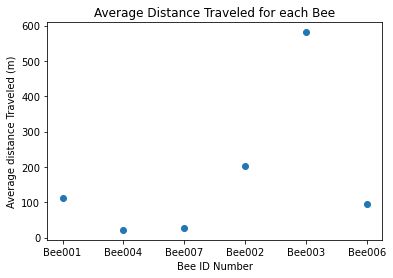

In [9]:
bee_names=['Bee001','Bee004','Bee007','Bee002','Bee003','Bee006']
dist_mean = [np.mean(move_bee001),np.mean(move_bee004),np.mean(move_bee007),
             np.mean(move_bee002),np.mean(move_bee003),np.mean(move_bee006)]
plt.scatter(bee_names,dist_mean)
plt.xlabel('Bee ID Number')
plt.ylabel('Average distance Traveled (m)')
plt.title('Average Distance Traveled for each Bee')
plt.show()

**We can see that the majority of the Worker bees had a larger average distance traveled in a single movement than the Queen Bees**

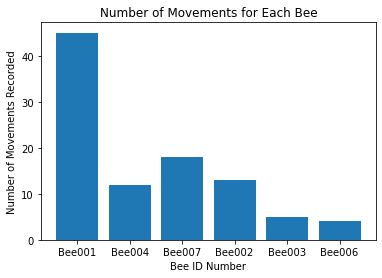

In [10]:
num_moves=[len(move_bee001),len(move_bee004),len(move_bee007),
           len(move_bee002),len(move_bee003),len(move_bee006)]
plt.bar(bee_names,num_moves)
plt.xlabel('Bee ID Number')
plt.ylabel('Number of Movements Recorded')
plt.title('Number of Movements for Each Bee')
plt.show()

**We see that the majority of the Queen Bees had more movements than the worker bees**

## Conclusion for Focus Area #1:
**From these three investigations we can conclude that the Queen Bees had more movements for short distances while the Worker Bees had fewer movements for long distances**

# Focus Area #2: Bee 001

### The researchers collected data specifically about the behavior of Bee 001

#### First: explore the data; This data was recorded for a period of time over 12 hours over two days.

In [11]:
%%capture 
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

x = bees[bees['individual-local-identifier'] == 1].iloc[0:-1]['location-long'].to_numpy()
y = bees[bees['individual-local-identifier'] == 1].iloc[0:-1]['location-lat'].to_numpy()

fig = plt.figure()
plt.xlim(8.9959, 9.0041)
plt.ylim(47.7629, 47.7675)
graph, = plt.plot([], [],'o', alpha =0.4)


def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = animation.FuncAnimation(fig, animate,interval=200);

In [13]:
writer = animation.PillowWriter()
ani.save('bees.gif',writer=writer)

#### Visualizing the Path of Bee 001 

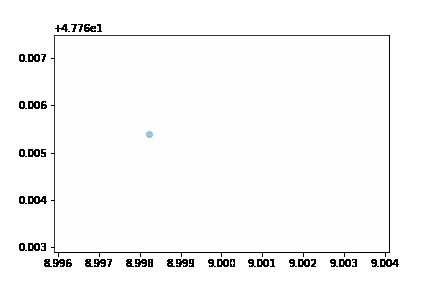

In [14]:
from IPython.display import Image
with open('bees.gif','rb') as file:
    display(Image(file.read()))

##### The researchers collected Data about the altitudee and  behavior of Bee 001, whether this queen bee was moving, resting, foraging. 

### My Hypothesis is that it she would rest often and would purposefully pick a lower altitude to rest at.

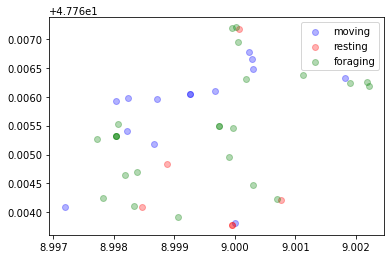

In [15]:
BEE_001 = bees[bees['individual-local-identifier'] == 1].iloc[0:-1].set_index(['behavioural-classification'])
plt.scatter(BEE_001.loc[idx['moving']]['location-long'],BEE_001.loc[idx['moving']]['location-lat'],c='blue',label='moving',alpha = 0.3)
plt.scatter(BEE_001.loc[idx['resting']]['location-long'],BEE_001.loc[idx['resting']]['location-lat'],c='red',label='resting',alpha = 0.3)
plt.scatter(BEE_001.loc[idx['foraging']]['location-long'],BEE_001.loc[idx['foraging']]['location-lat'],c='green',label='foraging',alpha = 0.3)
plt.legend()
plt.show()

In [16]:
behavior = bees_ind.loc[idx[1]].set_index('behavioural-classification').dropna()
data_boxplot = [behavior.loc[idx['moving']]['height-above-msl'],behavior.loc[idx['resting']]['height-above-msl'],
                behavior.loc[idx['foraging']]['height-above-msl']]
labels_boxplot = ['Moving','Resting','Foraging']

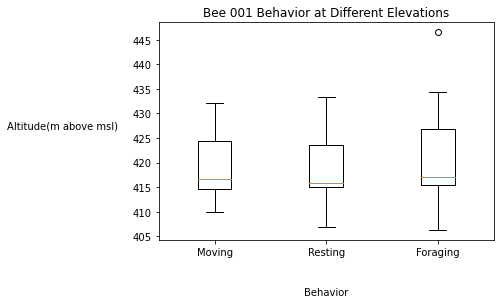

In [17]:
plt.boxplot(data_boxplot,labels = labels_boxplot)
plt.title('Bee 001 Behavior at Different Elevations')
plt.xlabel('Behavior',labelpad = 30)
plt.ylabel('Altitude(m above msl)',rotation=0,labelpad = 70)
plt.show()

### Conclusion for Focus Area #2:

**As we can see that the altitude for resting is not vastly different from the altitudes of Moving and Foraging. This along with the animated and color labeled scatter plots show that Bee 001 exhibits 'resting' behavior advantageously.**

#### Future work on this project - Using the Timestamp part of the data to find activity at different time of day